In [ ]:
library(MASS)
data(gehan)
data <- gehan
head(data)

# pair time cens treat  
# 1 1     1   1    control
# 2 1    10   1    6-MP   
# 3 2    22   1    control
# 4 2     7   1    6-MP   
# 5 3     3   1    control
# 6 3    32   0    6-MP

,pair,time,cens,treat
,<int>,<int>,<int>,<fct>
1,1,1,1,control
2,1,10,1,6-MP
3,2,22,1,control
4,2,7,1,6-MP
5,3,3,1,control
6,3,32,0,6-MP


In [3]:
library(tidyverse)
data %>% glimpse()

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.2     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Rows: 42
Columns: 4
$ pair  <int> 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11~
$ time  <int> 1, 10, 22, 7, 3, 32, 12, 23, 8, 22, 17, 6, 2, 16, 11, 34, 8, 32,~
$ cens  <int> 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0~
$ treat <fct> control, 6-MP, control, 6-MP, control, 6-MP, control, 6-MP, cont~


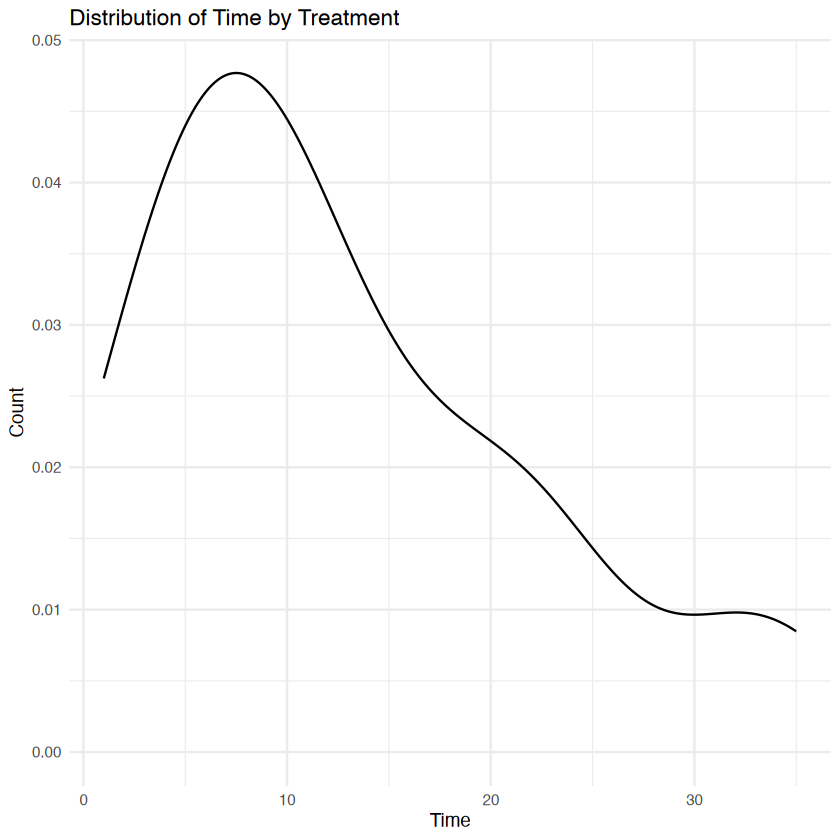

In [7]:
# 绘制time的分布
data %>% ggplot(aes(x = time)) +
  geom_density() +
  labs(title = "Distribution of Time by Treatment",
       x = "Time",
       y = "Count") +
  theme_minimal()

In [ ]:
# 拟合伽马回归模型（使用对数连接）
# family = Gamma(link = "log") 是关键
fit_gamma <- glm(time ~ treat + pair, data = data, family = Gamma(link = "log"))

# 查看模型结果
summary(fit_gamma)

# Call:
# glm(formula = time ~ treat + pair, family = Gamma(link = "log"), 
#     data = data)

# Coefficients:
#              Estimate Std. Error t value Pr(>|t|)    
# (Intercept)   3.06488    0.23686  12.940 1.08e-15 ***
# treatcontrol -0.66856    0.20577  -3.249  0.00239 ** 
# pair         -0.02172    0.01699  -1.278  0.20869    
# ---
# Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# (Dispersion parameter for Gamma family taken to be 0.4445794)

#     Null deviance: 26.262  on 41  degrees of freedom
# Residual deviance: 20.881  on 39  degrees of freedom
# AIC: 289.71

# Number of Fisher Scoring iterations: 6


Call:
glm(formula = time ~ treat + pair, family = Gamma(link = "log"), 
    data = data)

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.06488    0.23686  12.940 1.08e-15 ***
treatcontrol -0.66856    0.20577  -3.249  0.00239 ** 
pair         -0.02172    0.01699  -1.278  0.20869    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Gamma family taken to be 0.4445794)

    Null deviance: 26.262  on 41  degrees of freedom
Residual deviance: 20.881  on 39  degrees of freedom
AIC: 289.71

Number of Fisher Scoring iterations: 6


In [ ]:
fit_null <- glm(time ~ 1, data = data, family = Gamma(link = "log"))
anova(fit_null, fit_gamma, test = "Chisq")

# Resid. Df Resid. Dev Df Deviance Pr(>Chi)   
# 1 41        26.26238   NA      NA           NA
# 2 39        20.88092    2 5.38146  0.002352432

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,41,26.26238,NA,NA,NA
2,39,20.88092,2,5.38146,0.002352432


In [ ]:
library(car)
vif(fit_gamma)

# treat  pair 
#     1     1

treat  pair 
    1     1

In [ ]:
# 计算 Cook 距离
cook <- cooks.distance(fit_gamma)

# 显示 Cook 距离 > 0.5 的个案编号和 Cook 值
outliers <- which(cook > 0.5)
cook_outliers <- cook[outliers]
print(data.frame(case = outliers, cook_distance = cook_outliers))

# 显示最大 Cook 距离
cat("Max Cook Distance:", max(cook), "\n")

# [1] case          cook_distance
# <0 rows> (or 0-length row.names)
# Max Cook Distance: 0.2108134

[1] case          cook_distance
<0 rows> (or 0-length row.names)
Max Cook Distance: 0.2108134 


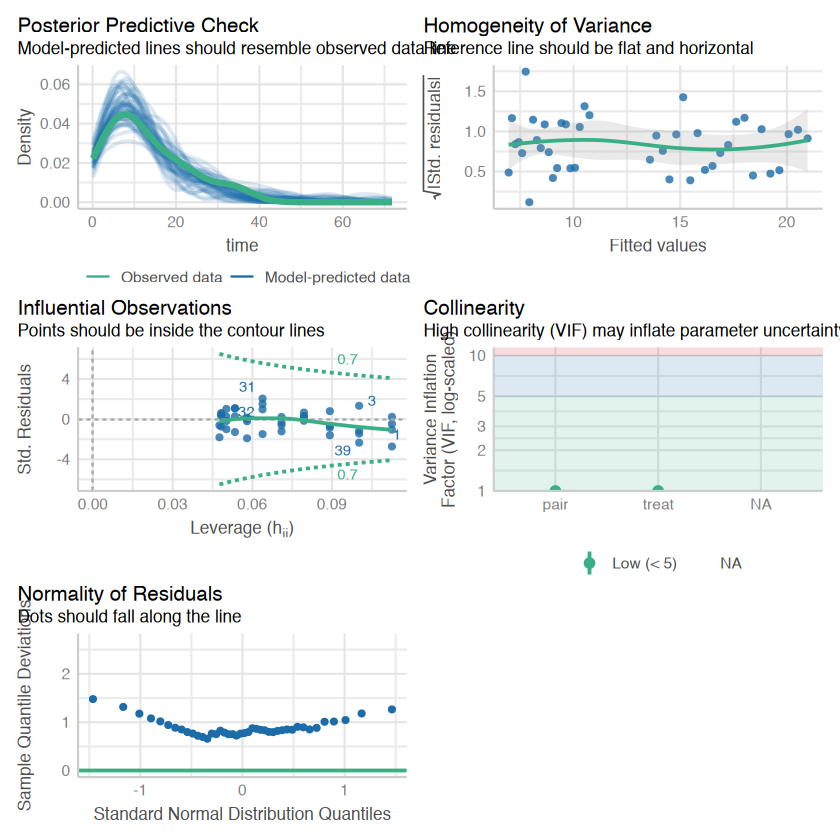

In [16]:
library(performance)
check_model(fit_gamma, residual_type = "normal")

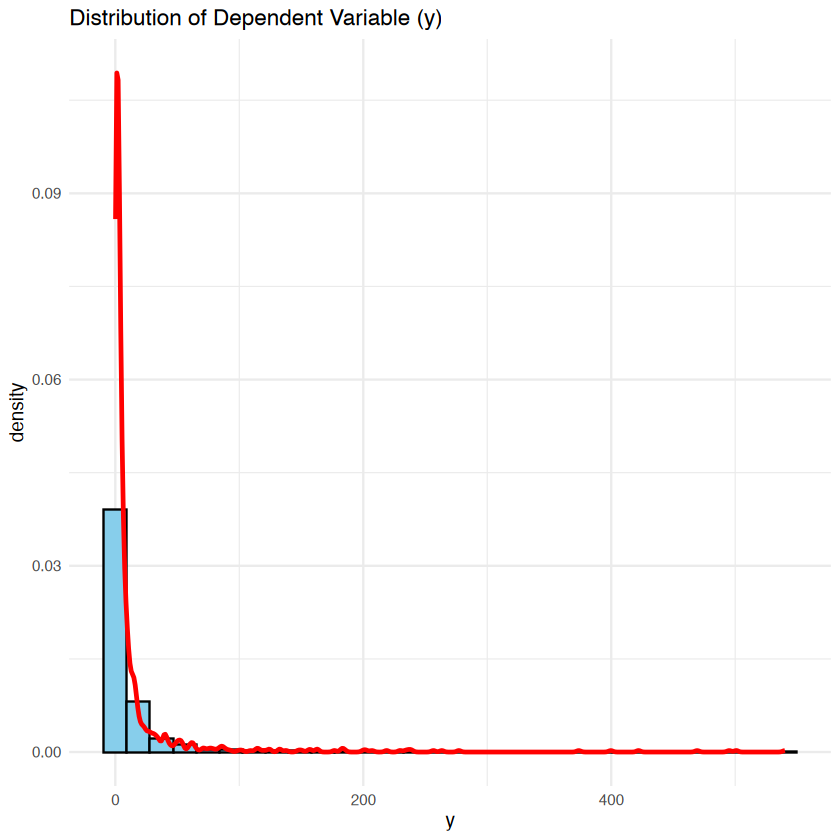

In [51]:
library(tidyverse)
library(statmod)
library(car)
library(lmtest)
library(see)

set.seed(1422)
n <- 1000
x1 <- rnorm(n, 10, 2)
x2 <- factor(sample(c("A", "B", "C"), n, replace = TRUE))
log_mu <- 1 + 0.15 * x1 + (x2 == "B") * 0.5 + (x2 == "C") * 1.0
mu <- exp(log_mu)
phi <- 0.5
y <- rinvgauss(n, mean = mu, shape = 1 / phi)
df <- tibble(y, x1, x2)

ggplot(df, aes(x = y)) +
  geom_histogram(
    aes(y = ..density..),
    bins = 30,
    fill = "skyblue",
    color = "black"
  ) +
  geom_density(color = "red", size = 1) +
  theme_minimal() +
  labs(title = "Distribution of Dependent Variable (y)")

In [52]:
# 拟合逆高斯回归模型（使用对数连接）
fit_ig <- glm(y ~ x1 + x2, data = df, family = inverse.gaussian(link = "log"))

# 查看模型结果
summary(fit_ig)

# Call:
# glm(formula = y ~ x1 + x2, family = inverse.gaussian(link = "log"), 
#     data = df)

# Coefficients:
#             Estimate Std. Error t value Pr(>|t|)  
# (Intercept)  1.60039    0.77504   2.065   0.0402 *
# x1           0.08172    0.07373   1.108   0.2691  
# x2B          0.49065    0.35994   1.363   0.1744  
# x2C          0.22459    0.34869   0.644   0.5203  
# ---
# Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# (Dispersion parameter for inverse.gaussian family taken to be 0.3021997)

#     Null deviance: 101.45  on 199  degrees of freedom
# Residual deviance: 100.63  on 196  degrees of freedom
# AIC: 1304

# Number of Fisher Scoring iterations: 14


Call:
glm(formula = y ~ x1 + x2, family = inverse.gaussian(link = "log"), 
    data = df)

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.09861    0.41504   2.647  0.00825 **
x1           0.13928    0.04251   3.277  0.00109 **
x2B          0.24697    0.18868   1.309  0.19085   
x2C          0.71946    0.22729   3.165  0.00160 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for inverse.gaussian family taken to be 0.4676272)

    Null deviance: 497.48  on 999  degrees of freedom
Residual deviance: 488.66  on 996  degrees of freedom
AIC: 6439.8

Number of Fisher Scoring iterations: 22


In [ ]:
library(car)
vif(fit_ig)

# GVIF     Df GVIF^(1/(2*Df))
# x1 1.019675 1  1.009789       
# x2 1.019675 2  1.004883

,GVIF,Df,GVIF^(1/(2*Df))
x1,1.019675,1,1.009789
x2,1.019675,2,1.004883


In [ ]:
# 计算 Cook 距离
cook <- cooks.distance(fit_ig)

# 显示 Cook 距离 > 0.5 的个案编号和 Cook 值
outliers <- which(cook > 0.5)
cook_outliers <- cook[outliers]
print(data.frame(case = outliers, cook_distance = cook_outliers))

# 显示最大 Cook 距离
cat("Max Cook Distance:", max(cook), "\n")

# [1] case          cook_distance
# <0 rows> (or 0-length row.names)
# Max Cook Distance: 0.4364475

[1] case          cook_distance
<0 rows> (or 0-length row.names)
Max Cook Distance: 0.4364475 


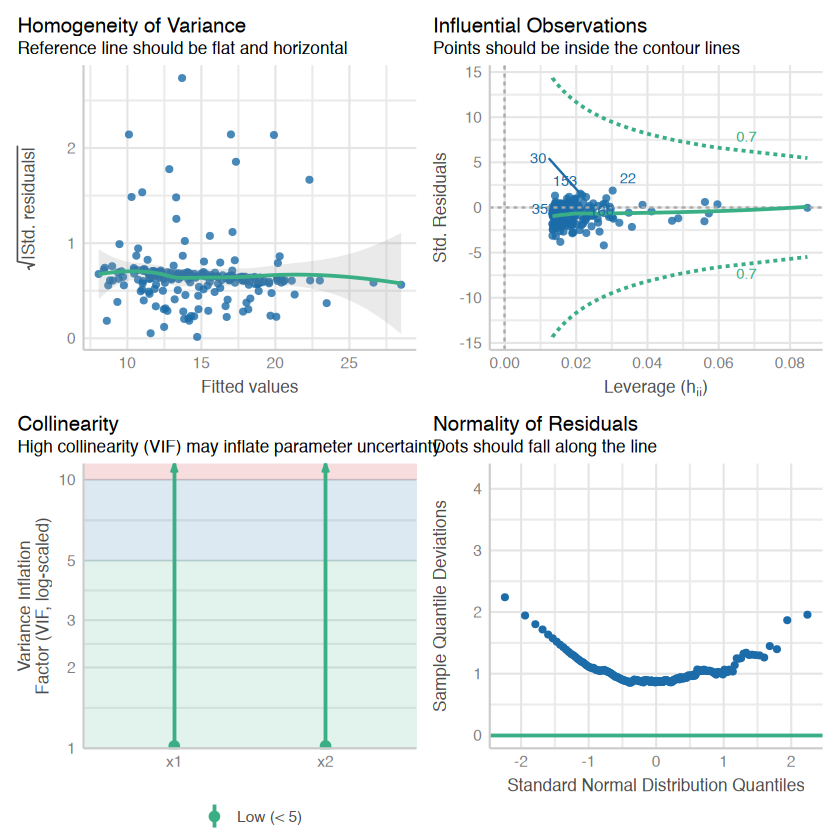

In [28]:
library(performance)
check_model(fit_ig, residual_type = "normal")

In [5]:
# 加载armd数据集
library(MASS)
data(armd)
data <- armd
head(data)

Warning message in data(armd):
"data set 'armd' not found"


ERROR: Error: object 'armd' not found


In [1]:
library(nmle)
fit <- gls(data = mtcars, mpg ~ wt + hp, method = "ML", 
           correlation = corAR1(form = ~ 1 | cyl), 
           weights = varIdent(form = ~ 1 | cyl))

ERROR: Error in library(nmle): there is no package called 'nmle'


In [4]:
# 测试gls
library(nlme)
fit <- gls(
  mpg ~ wt + hp,
  data = mtcars,
  method = "REML",
  weights = varIdent(form = ~ 1 | cyl),
)
print(fit)

Generalized least squares fit by REML
  Model: mpg ~ wt + hp 
  Data: mtcars 
  Log-restricted-likelihood: -74.61461

Coefficients:
(Intercept)          wt          hp 
33.01078398 -3.24781328 -0.02361071 

Variance function:
 Structure: Different standard deviations per stratum
 Formula: ~1 | cyl 
 Parameter estimates:
       6        4        8 
1.000000 4.371534 2.122357 
Degrees of freedom: 32 total; 29 residual
Residual standard error: 0.9901131 


In [6]:
intervals(fit)

Approximate 95% confidence intervals

 Coefficients:
                  lower        est.       upper
(Intercept) 29.90557360 33.01078398 36.11599437
wt          -4.30039695 -3.24781328 -2.19522961
hp          -0.03712484 -0.02361071 -0.01009658

 Variance function:
     lower     est.     upper
4 1.892805 4.371534 10.096290
8 1.056635 2.122357  4.262968

 Residual standard error:
    lower      est.     upper 
0.5421447 0.9901131 1.8082329 